# **Part 1: Text Analysis**

In [ ]:
# import Python packages
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# regression package
import statsmodels.api as sm

# sentiment analysis packages
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from textblob import TextBlob

# topic modeling packages
import gensim
from gensim import corpora

uploaded = files.upload()
data = pd.read_csv('product_reviews.csv')
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Review_ID,Item_ID,Base_item_ID,Review_date,Reviewer_ID,Real_name,Verified_purchase,Rating,Title,Content,...,Helpful_votes_week15,Helpful_votes_week16,Helpful_votes_week17,Helpful_votes_week18,Helpful_votes_week19,Helpful_votes_week20,Helpful_votes_week21,Helpful_votes_week22,Helpful_votes_week23,Helpful_votes_week24
0,R100E6MT94PK6L,B0051VVOB2,NaN,1/8/2012,A1HGATCAMGXTGF,False,True,5,Love My Kindle Fire!,I love my fire and highly recommend it to anyo...,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
1,R100HU42LKLLD0,B0057O9O6K,NaN,4/10/2012,A3GGO95QT2PP47,False,True,2,Not the best Tablet or a good buy,The operating system is is an early android. Y...,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,R100PBXP49AU0B,B0051VVOB2,NaN,3/26/2012,AA8JPO5R668P8,True,True,2,"Had it 3 months, would not purchase again",I have been reading on Kindle since the Kindle...,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6
3,R100U020EZR95F,B0051VVOB2,NaN,6/14/2012,A1NDQ8WBRADEO8,True,False,5,College Grad - I use it waaaay more than my la...,I bought the Fire because I wanted access to a...,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6
4,R101ANBUYVZCUM,B004U9USEA,NaN,5/21/2011,A1M0INXF0D3R4J,False,True,5,Better than I expected.,I got the Galaxy Tab because I wanted a comput...,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2


**1. Use the tablet review data to calculate the distribution of sentiment polarities (i.e., positive, neutral, negative) for the following Kindle attributes: screen, customer service, weight, price. Hint: Filter the reviews by the attributes in the same way we filtered for “kindle” reviews. What is the ratio of positive reviews to negative reviews for each of these attributes?**

In [ ]:
# keep only the review text (Content) and star ratings and only the reviews related to kindle 
reviews_sample = data[['Rating','Content']]

# remove punctuation and numbers, lower case the text
def clean(text):
    # replace any non-letters with a space
    text = re.sub('[^A-Za-z]+', ' ', text)
    # lower case the text
    text = text.lower()
    return text

# apply the function clean to each review
reviews_sample['Cleaned Reviews'] = reviews_sample['Content'].apply(clean)
reviews_sample = reviews_sample[reviews_sample['Content'].str.contains('kindle')]

# we want to analyze the reviews on Kindle basded on the screen, customer service, weight, price
reviews_sample_screen = reviews_sample[reviews_sample['Content'].str.contains('screen')]
reviews_sample_customer_service = reviews_sample[reviews_sample['Content'].str.contains('customer service')]
reviews_sample_weight = reviews_sample[reviews_sample['Content'].str.contains('weight')]
reviews_sample_price = reviews_sample[reviews_sample['Content'].str.contains('price')]

# tokenize, remove stop words, stem
# we use the Porter stemmer, a process for removing suffixes from words in English
ps = PorterStemmer() 

def token_stop_stem(text):
    tokens = word_tokenize(text) # tokenize the text
    newlist = []
    new_review = ""
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          word_stem = ps.stem(word) # stem each word
          newlist.append(word_stem)
          new_review = new_review + " " + word_stem
    return new_review

reviews_sample_screen['Final Reviews'] = reviews_sample_screen['Cleaned Reviews'].apply(token_stop_stem)
reviews_sample_customer_service['Final Reviews'] = reviews_sample_customer_service['Cleaned Reviews'].apply(token_stop_stem)
reviews_sample_weight['Final Reviews'] = reviews_sample_weight['Cleaned Reviews'].apply(token_stop_stem)
reviews_sample_price['Final Reviews'] = reviews_sample_price['Cleaned Reviews'].apply(token_stop_stem)

# we will score the polarity of each review
# polarity ranges from -1 (negative) to 1 (positive)
def getPolarityScore(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def getPolarity(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

reviews_sample_screen['Score'] = reviews_sample_screen['Final Reviews'].apply(getPolarityScore) 
reviews_sample_screen['Polarity'] = reviews_sample_screen['Score'].apply(getPolarity)

reviews_sample_customer_service['Score'] = reviews_sample_customer_service['Final Reviews'].apply(getPolarityScore) 
reviews_sample_customer_service['Polarity'] = reviews_sample_customer_service['Score'].apply(getPolarity)

reviews_sample_weight['Score'] = reviews_sample_weight['Final Reviews'].apply(getPolarityScore) 
reviews_sample_weight['Polarity'] = reviews_sample_weight['Score'].apply(getPolarity)

reviews_sample_price['Score'] = reviews_sample_price['Final Reviews'].apply(getPolarityScore) 
reviews_sample_price['Polarity'] = reviews_sample_price['Score'].apply(getPolarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Screen reviews polarity ratio
 Positive    0.933293
Negative    0.059976
Neutral     0.006732
Name: Polarity, dtype: float64


Text(0.5, 1.0, 'Screen reviews polarity ratio')

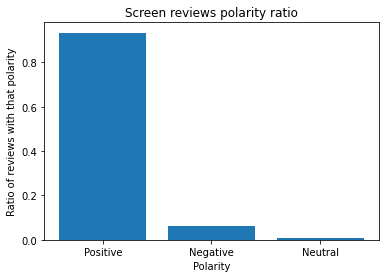

In [ ]:
# Ratio of positive reviews to negative reviews for screen
print('Screen reviews polarity ratio\n',reviews_sample_screen['Polarity'].value_counts()/reviews_sample_screen['Polarity'].value_counts().sum())
plt.bar((reviews_sample_screen['Polarity'].value_counts()/reviews_sample_screen['Polarity'].value_counts().sum()).keys(),
        (reviews_sample_screen['Polarity'].value_counts()/reviews_sample_screen['Polarity'].value_counts().sum()).values)
plt.xlabel('Polarity')
plt.ylabel('Ratio of reviews with that polarity')
plt.title('Screen reviews polarity ratio')

Customer service reviews polarity ratio
 Positive    0.890323
Negative    0.090323
Neutral     0.019355
Name: Polarity, dtype: float64


Text(0.5, 1.0, 'Screen reviews polarity ratio')

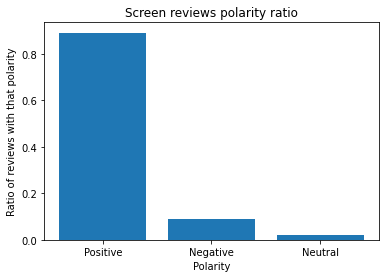

In [ ]:
# Ratio of positive reviews to negative reviews for customer service
print('Customer service reviews polarity ratio\n',reviews_sample_customer_service['Polarity'].value_counts()/reviews_sample_customer_service['Polarity'].value_counts().sum())
plt.bar((reviews_sample_customer_service['Polarity'].value_counts()/reviews_sample_customer_service['Polarity'].value_counts().sum()).keys(),
        (reviews_sample_customer_service['Polarity'].value_counts()/reviews_sample_customer_service['Polarity'].value_counts().sum()).values)
plt.xlabel('Polarity')
plt.ylabel('Ratio of reviews with that polarity')
plt.title('Customer service reviews polarity ratio')

Weight reviews polarity ratio
 Positive    0.981818
Negative    0.018182
Name: Polarity, dtype: float64


Text(0.5, 1.0, 'Weight reviews polarity ratio')

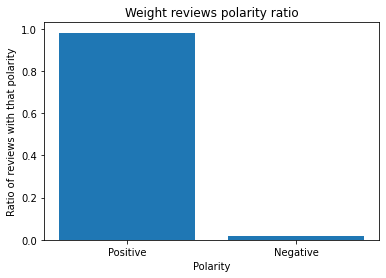

In [ ]:
# Ratio of positive reviews to negative reviews for weight
print('Weight reviews polarity ratio\n',reviews_sample_weight['Polarity'].value_counts()/reviews_sample_weight['Polarity'].value_counts().sum())
plt.bar((reviews_sample_weight['Polarity'].value_counts()/reviews_sample_weight['Polarity'].value_counts().sum()).keys(),
        (reviews_sample_weight['Polarity'].value_counts()/reviews_sample_weight['Polarity'].value_counts().sum()).values)
plt.xlabel('Polarity')
plt.ylabel('Ratio of reviews with that polarity')
plt.title('Weight reviews polarity ratio')

Price reviews polarity ratio
 Positive    0.956481
Negative    0.031481
Neutral     0.012037
Name: Polarity, dtype: float64


Text(0.5, 1.0, 'Price reviews polarity ratio')

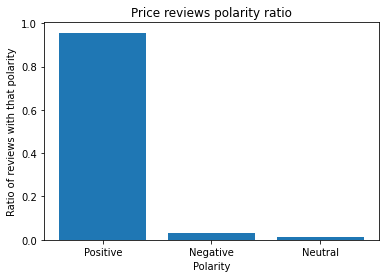

In [ ]:
# Ratio of positive reviews to negative reviews for price
print('Price reviews polarity ratio\n',reviews_sample_price['Polarity'].value_counts()/reviews_sample_price['Polarity'].value_counts().sum())
plt.bar((reviews_sample_price['Polarity'].value_counts()/reviews_sample_price['Polarity'].value_counts().sum()).keys(),
        (reviews_sample_price['Polarity'].value_counts()/reviews_sample_price['Polarity'].value_counts().sum()).values)
plt.xlabel('Polarity')
plt.ylabel('Ratio of reviews with that polarity')
plt.title('Price reviews polarity ratio')

**2. Run Latent Dirichlet Allocation for the Amazon Kindle reviews after cleaning and removing the stop words (do not stem) for 3, 5, and 7 topics (you can use the same hyperparameters and seed (9651) in the text analysis ipynb reviewed in class).**

**A.   Give names to the topics based on the top ten words of each model.**

**B.   Do the topics overlap?**

**C.   Calculate the perplexity of each model.**

# See pdf for written answers and the analysis of the results.

In [ ]:
# tokenize, remove stop words, return tokens

def token_stop(text):
    tokens = word_tokenize(text) # tokenize the text
    newlist = []
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          newlist.append(word)
    return newlist

reviews_sample['LDA Reviews'] = reviews_sample['Cleaned Reviews'].apply(token_stop)
reviews_sample.head()

,Rating,Content,Cleaned Reviews,LDA Reviews
17,2,I really wanted to like the Kindle fire. I'm a...,i really wanted to like the kindle fire i m a ...,"[really, wanted, like, kindle, fire, long, tim..."
37,3,love my first kindle so i purchased the fire. ...,love my first kindle so i purchased the fire n...,"[love, first, kindle, purchased, fire, happy, ..."
42,5,Got it for my wife for Christmas and she loves...,got it for my wife for christmas and she loves...,"[got, wife, christmas, loves, good, around, pr..."
45,5,I bought a kindle fire for my wife and she had...,i bought a kindle fire for my wife and she had...,"[bought, kindle, fire, wife, problem, viewing,..."
46,3,I bought the kindle fire as a cheap alternativ...,i bought the kindle fire as a cheap alternativ...,"[bought, kindle, fire, cheap, alternative, ipa..."


In [ ]:
dict_ = corpora.Dictionary(reviews_sample['LDA Reviews'])
print(dict_)

Dictionary(16247 unique tokens: ['also', 'always', 'amazon', 'anyone', 'app']...)


In [ ]:
# convert list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in reviews_sample['LDA Reviews']]

In [ ]:
# For 3 topics
num_topics = 3
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model = lda(doc_term_matrix,
    num_topics=num_topics,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

print(lda_model.print_topics(num_words=10))
# calculate model perplexity
print(f'Perplexity using {num_topics} topics',lda_model.log_perplexity(doc_term_matrix))

[(0, '0.051*"kindle" + 0.030*"fire" + 0.014*"amazon" + 0.012*"one" + 0.012*"love" + 0.010*"would" + 0.009*"get" + 0.007*"bought" + 0.006*"got" + 0.006*"books"'), (1, '0.009*"thrive" + 0.006*"google" + 0.004*"touchpad" + 0.004*"hp" + 0.004*"cruz" + 0.003*"pan" + 0.003*"www" + 0.002*"http" + 0.002*"le" + 0.002*"im"'), (2, '0.021*"kindle" + 0.017*"fire" + 0.010*"amazon" + 0.009*"ipad" + 0.009*"like" + 0.009*"tablet" + 0.008*"screen" + 0.008*"device" + 0.008*"apps" + 0.008*"use"')]
Perplexity using 3 topics -7.381948917365645


In [ ]:
# For 5 topics
num_topics = 5
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model = lda(doc_term_matrix,
    num_topics=num_topics,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

print(lda_model.print_topics(num_words=10))
# calculate model perplexity
print(f'Perplexity using {num_topics} topics',lda_model.log_perplexity(doc_term_matrix))

[(0, '0.036*"kindle" + 0.019*"fire" + 0.017*"amazon" + 0.011*"one" + 0.010*"would" + 0.010*"get" + 0.007*"problem" + 0.007*"even" + 0.006*"buy" + 0.006*"back"'), (1, '0.014*"cruz" + 0.003*"foreign" + 0.003*"skills" + 0.002*"feedback" + 0.002*"coby" + 0.002*"kyros" + 0.002*"mi" + 0.002*"www" + 0.002*"en" + 0.002*"japanese"'), (2, '0.017*"kindle" + 0.014*"fire" + 0.012*"amazon" + 0.011*"device" + 0.009*"ipad" + 0.009*"like" + 0.008*"apps" + 0.008*"screen" + 0.007*"app" + 0.006*"use"'), (3, '0.027*"tablet" + 0.016*"android" + 0.011*"screen" + 0.008*"market" + 0.007*"works" + 0.006*"apps" + 0.006*"good" + 0.006*"use" + 0.006*"great" + 0.006*"work"'), (4, '0.055*"kindle" + 0.036*"fire" + 0.021*"love" + 0.017*"books" + 0.014*"great" + 0.013*"read" + 0.011*"use" + 0.010*"one" + 0.010*"like" + 0.009*"would"')]
Perplexity using 5 topics -7.382488124920874


In [ ]:
# For 7 topics
num_topics = 7
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model = lda(doc_term_matrix,
    num_topics=num_topics,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

print(lda_model.print_topics(num_words=10))
# calculate model perplexity
print(lda_model.log_perplexity(doc_term_matrix))

[(0, '0.039*"kindle" + 0.020*"fire" + 0.016*"amazon" + 0.012*"one" + 0.011*"get" + 0.011*"would" + 0.008*"problem" + 0.007*"even" + 0.007*"back" + 0.007*"customer"'), (1, '0.019*"cruz" + 0.003*"foreign" + 0.003*"skills" + 0.003*"velocity" + 0.003*"mi" + 0.003*"mobo" + 0.002*"japanese" + 0.002*"adaptor" + 0.002*"coby" + 0.002*"india"'), (2, '0.014*"kindle" + 0.013*"fire" + 0.012*"amazon" + 0.011*"device" + 0.009*"apps" + 0.009*"like" + 0.008*"screen" + 0.008*"ipad" + 0.007*"app" + 0.007*"tablet"'), (3, '0.030*"tablet" + 0.017*"android" + 0.013*"screen" + 0.009*"market" + 0.007*"works" + 0.006*"work" + 0.006*"good" + 0.006*"great" + 0.006*"tablets" + 0.006*"also"'), (4, '0.049*"kindle" + 0.030*"fire" + 0.026*"books" + 0.024*"amazon" + 0.017*"free" + 0.012*"prime" + 0.012*"book" + 0.011*"read" + 0.010*"love" + 0.010*"apps"'), (5, '0.024*"thrive" + 0.008*"u" + 0.006*"toshiba" + 0.003*"case" + 0.003*"luv" + 0.003*"hence" + 0.003*"wrap" + 0.003*"sorry" + 0.003*"soo" + 0.003*"words"'), (6, '0